# 8. Capstone Project - Hyperparameter Optimization; SVM

#### Loading data and libralies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as stats

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

In [2]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [3]:
# Original data set
original_df = pd.read_csv("./capstone_clean_heart_disease_fe.csv")

# Train set : Under sampled data set and Over sampled data set
under_sampled_df = pd.read_csv("./under_sampled_df_fe.csv")
over_sampled_df = pd.read_csv("./over_sampled_df_fe.csv")
# Test set : Under sampled data set and Over sampled data set
test_sampled_df = pd.read_csv("./test_sampled_df_fe.csv")
               
# Train set : SMOTE data set         
smote_df = pd.read_csv("./smote_df.csv")
# Test set : SMOTE data set  
test_smote_df = pd.read_csv("./test_smote_df.csv")

Split each dataset into train set and test set

In [4]:
# Split the original data set into train and test set
X = original_df.drop(columns="HeartDisease")
y = original_df["HeartDisease"]

from sklearn.model_selection import train_test_split

X_train_original, X_test_original, y_train_original, y_test_original = train_test_split(X, y, test_size = 0.3, random_state=42)

In [5]:
# Split other data set into X and y
X_train_under = under_sampled_df.drop(columns="HeartDisease")
y_train_under = under_sampled_df["HeartDisease"]

X_train_over = over_sampled_df.drop(columns="HeartDisease")
y_train_over = over_sampled_df["HeartDisease"]

X_test_sampled = test_sampled_df.drop(columns="HeartDisease")
y_test_sampled = test_sampled_df["HeartDisease"]

X_train_smote = smote_df.drop(columns="HeartDisease")
y_train_smote = smote_df["HeartDisease"]

X_test_smote = test_smote_df.drop(columns="HeartDisease")
y_test_smote = test_smote_df["HeartDisease"]

In [6]:
X_train = [X_train_original, X_train_under, X_train_over, X_train_smote]
X_test = [X_test_original, X_test_sampled, X_test_sampled, X_test_smote]
y_train = [y_train_original, y_train_under, y_train_over,y_train_smote]
y_test = [y_test_original, y_test_sampled, y_test_sampled, y_test_smote]

train_score = []
test_score = []

for index in range(4):
    
    scaler = StandardScaler()
    scaler.fit(X_train[index])
    X_scaled_train = scaler.transform(X_train[index])
    X_scaled_test = scaler.transform(X_test[index])
    
    model = LogisticRegression(max_iter=1000, random_state=42)
    model.fit(X_scaled_train,y_train[index])
    
    train_score.append(model.score(X_scaled_train,y_train[index])*100)
    test_score.append(model.score(X_scaled_test,y_test[index])*100)

In [7]:
before_selection = pd.DataFrame((train_score, test_score), columns=["Original", "Under Sampled", "Over Sampled", "SMOTE"], 
                                index=["Train score", "Test score"])
before_selection

,Original,Under Sampled,Over Sampled,SMOTE
Train score,91.452915,75.787020,75.675365,80.968618
Test score,91.389649,73.322747,73.284094,77.891185


**Festure selection: RFE**  
The columns that I'll use for modeling

In [8]:
# RFE : Original data final

from sklearn.feature_selection import RFE

scaler = StandardScaler()
scaler.fit(X_train_original)
X_scaled_train = scaler.transform(X_train_original)
X_scaled_test = scaler.transform(X_test_original)

rfe_original = RFE(estimator=LogisticRegression(max_iter=1000, random_state=42), n_features_to_select=7)
rfe_original.fit(X_scaled_train,y_train_original)
    
train_score_or_rfe = rfe_original.score(X_scaled_train,y_train_original)
test_score_or_rfe = rfe_original.score(X_scaled_test,y_test_original)

In [9]:
X_train_original.loc[:, rfe_original.support_]

,BMI,Smoking,DiffWalking,Sex,AgeCategory,GenHealth,Asthma
176993,27.12,1,0,1,35,3,0
267593,30.23,0,0,0,18,2,0
175707,32.55,0,0,1,60,3,0
317039,33.07,0,0,0,55,3,0
262926,23.06,0,0,1,30,4,0
...,...,...,...,...,...,...,...
119879,26.62,0,0,0,40,4,0
259178,25.04,0,0,1,25,4,0
131932,36.05,0,0,0,18,1,0
146867,27.44,0,0,0,40,3,0


In [10]:
# RFE : Under sampled data final

scaler = StandardScaler()
scaler.fit(X_train_under)
X_scaled_train = scaler.transform(X_train_under)
X_scaled_test = scaler.transform(X_test_sampled)
   
rfe_under = RFE(estimator=LogisticRegression(max_iter=1000, random_state=42), n_features_to_select=9)
rfe_under.fit(X_scaled_train,y_train_under)
    
train_score_u_rfe = rfe_under.score(X_scaled_train,y_train_under)
test_score_u_rfe = rfe_under.score(X_scaled_test,y_test_sampled)

In [11]:
X_train_under.loc[:, rfe_under.support_]

,Smoking,AlcoholDrinking,PhysicalHealth,DiffWalking,Sex,AgeCategory,GenHealth,Asthma,Race_Asian
0,1,0,0.0,0,1,65,1,0,0
1,0,0,5.0,0,0,80,0,0,0
2,0,0,0.0,0,0,40,4,0,0
3,0,0,7.0,1,0,60,2,0,0
4,1,0,0.0,0,1,70,3,0,0
...,...,...,...,...,...,...,...,...,...
38177,0,0,0.0,0,1,75,3,0,0
38178,0,0,30.0,1,0,50,0,0,0
38179,0,0,0.0,0,0,75,2,0,0
38180,1,0,15.0,0,1,70,3,0,0


In [12]:
# RFE : Over sampled data final

scaler = StandardScaler()
scaler.fit(X_train_over)
X_scaled_train = scaler.transform(X_train_over)
X_scaled_test = scaler.transform(X_test_sampled)
   
rfe_over = RFE(estimator=LogisticRegression(max_iter=1000, random_state=42), n_features_to_select=11)
rfe_over.fit(X_scaled_train,y_train_over)
    
train_score_ov_rfe = rfe_over.score(X_scaled_train,y_train_over)
test_score_ov_rfe = rfe_over.score(X_scaled_test,y_test_sampled)

In [13]:
X_train_over.loc[:, rfe_over.support_]

,BMI,Smoking,AlcoholDrinking,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,GenHealth,Asthma,Race_Asian
0,27.12,1,0,0.0,2.0,0,1,35,3,0,0
1,30.23,0,0,0.0,0.0,0,0,18,2,0,0
2,32.55,0,0,0.0,0.0,0,1,60,3,0,0
3,33.07,0,0,0.0,0.0,0,0,55,3,0,0
4,23.06,0,0,0.0,0.0,0,1,30,4,0,0
...,...,...,...,...,...,...,...,...,...,...,...
408515,42.87,0,0,30.0,0.0,1,0,60,2,0,0
408516,24.41,0,0,0.0,0.0,0,1,65,2,0,0
408517,33.00,0,0,0.0,0.0,0,1,60,1,0,0
408518,31.32,1,0,3.0,2.0,0,0,65,2,1,0


In [14]:
# RFE : SMOTE data final

scaler = StandardScaler()
scaler.fit(X_train_smote)
X_scaled_train = scaler.transform(X_train_smote)
X_scaled_test = scaler.transform(X_test_smote)
    
rfe_smote = RFE(estimator=LogisticRegression(max_iter=1500, random_state=42), n_features_to_select=10)
rfe_smote.fit(X_scaled_train,y_train_smote)
    
train_score_s_rfe = rfe_smote.score(X_scaled_train,y_train_smote)
test_score_s_rfe = rfe_smote.score(X_scaled_test,y_test_smote)

In [15]:
X_train_smote.loc[:, rfe_smote.support_]

,AlcoholDrinking,AgeCategory,GenHealth,Asthma,Race_American Indian/Alaskan Native,Race_Asian,Race_Black,Race_Hispanic,Race_Other,Race_White
0,0,35,3,0,0,0,0,0,0,1
1,0,18,2,0,0,0,0,1,0,0
2,0,60,3,0,0,0,0,0,0,1
3,0,55,3,0,0,0,0,1,0,0
4,0,30,4,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...
408515,0,80,1,0,0,0,0,0,0,1
408516,0,65,3,0,0,0,0,0,0,1
408517,0,70,2,0,0,0,0,0,0,0
408518,0,75,2,0,0,0,0,0,0,1


### Optimizing Hyperparameters: SVM

There are two classes in the sklearn.svm module of the sklearn library, LinearSVC and SVC. Therefore, I'll try both of them.

### Baseline Model

Create baseline models and see the accuracies.

In [16]:
from sklearn.svm import LinearSVC, SVC
from sklearn.metrics import f1_score
from sklearn.decomposition import PCA

In [17]:
# Function for creating LinearSVC model

def L_svc(X_train, y_train, X_test, y_test):
    
    scaler = StandardScaler()
    scaler.fit(X_train)
    X_scaled_train = scaler.transform(X_train)
    X_scaled_test = scaler.transform(X_test)
    
    l_svc_model = LinearSVC()
    l_svc_model.fit(X_scaled_train, y_train)
    
    train_score = l_svc_model.score(X_scaled_train, y_train)
    test_score = l_svc_model.score(X_scaled_test, y_test)
    
    # Evaluation(precision & Recall)
    y_pred = l_svc_model.predict(X_scaled_test)

    report_initial = classification_report(y_test, y_pred)
    
    return print(f"Train score: {train_score}\nTest score: {test_score}\n{report_initial}")

In [18]:
# Function for creating LinearSVC model with PCA

def L_svc_PCA(X_train, y_train, X_test, y_test):
    
    scaler = StandardScaler()
    scaler.fit(X_train)
    X_scaled_train = scaler.transform(X_train)
    X_scaled_test = scaler.transform(X_test)
    
    my_PCA = PCA()
    my_PCA.fit(X_scaled_train)

    X_train_PCA = my_PCA.transform(X_scaled_train)
    X_test_PCA = my_PCA.transform(X_scaled_test)   
    
    l_svc_model = LinearSVC()
    l_svc_model.fit(X_train_PCA, y_train)
    
    train_score = l_svc_model.score(X_train_PCA, y_train)
    test_score = l_svc_model.score(X_test_PCA, y_test)
    
    # Evaluation(precision & Recall)
    y_pred = l_svc_model.predict(X_test_PCA)

    report_initial = classification_report(y_test, y_pred)
    
    return print(f"Train score: {train_score}\nTest score: {test_score}\n{report_initial}")

In [19]:
# Function for creating SVC model

def svc(X_train, y_train, X_test, y_test):
    
    scaler = StandardScaler()
    scaler.fit(X_train)
    X_scaled_train = scaler.transform(X_train)
    X_scaled_test = scaler.transform(X_test)
    
    svc_model = SVC()
    svc_model.fit(X_scaled_train, y_train)
    
    train_score = svc_model.score(X_scaled_train, y_train)
    test_score = svc_model.score(X_scaled_test, y_test)
    
    # Evaluation(precision & Recall)
    y_pred = svc_model.predict(X_scaled_test)

    report_initial = classification_report(y_test, y_pred)
    
    return print(f"Train score: {train_score}\nTest score: {test_score}\n{report_initial}")

In [20]:
# Function for creating SVC model with PCA

def svc_PCA(X_train, y_train, X_test, y_test):
    
    scaler = StandardScaler()
    scaler.fit(X_train)
    X_scaled_train = scaler.transform(X_train)
    X_scaled_test = scaler.transform(X_test)
    
    my_PCA = PCA()
    my_PCA.fit(X_scaled_train)

    X_train_PCA = my_PCA.transform(X_scaled_train)
    X_test_PCA = my_PCA.transform(X_scaled_test)   
    
    svc_model = SVC()
    svc_model.fit(X_train_PCA, y_train)
    
    train_score = svc_model.score(X_train_PCA, y_train)
    test_score = svc_model.score(X_test_PCA, y_test)
    
    # Evaluation(precision & Recall)
    y_pred = svc_model.predict(X_test_PCA)

    report_initial = classification_report(y_test, y_pred)
    
    return print(f"Train score: {train_score}\nTest score: {test_score}\n{report_initial}")

It seems like SVC is heavier to create a model than LinearSVC is, and some of the dataset took too long to create SVC model. Thefore, I'll use sample from those datasets and create SVC model.

In [21]:
# Take samples for SVC

X_SVC_original, X_rest_original, y_SVC_original, y_rest_original = \
                train_test_split(X_train_original.loc[:, rfe_original.support_], y_train_original, train_size = 0.1, random_state=42)

X_SVC_over, X_rest_over, y_SVC_over, y_rest_over = \
                train_test_split(X_train_over.loc[:, rfe_over.support_], y_train_over, train_size = 0.1, random_state=42)

X_SVC_smote, X_rest_smote, y_SVC_smote, y_rest_smote = \
                train_test_split(X_train_smote.loc[:, rfe_smote.support_], y_train_smote, train_size = 0.1, random_state=42)

**Original data**

In [21]:
print("LinearSVC: no PCA\n")

print("Original dataset")
L_svc(X_train_original.loc[:, rfe_original.support_], y_train_original, \
            X_test_original.loc[:, rfe_original.support_], y_test_original)

LinearSVC: no PCA

Original dataset


C:\Users\yumem\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


Train score: 0.9145291491867061
Test score: 0.9145546478343537
              precision    recall  f1-score   support

           0       0.91      1.00      0.96     87544
           1       0.33      0.00      0.00      8178

    accuracy                           0.91     95722
   macro avg       0.62      0.50      0.48     95722
weighted avg       0.86      0.91      0.87     95722



In [19]:
print("LinearSVC: PCA\n")

print("Original dataset")
L_svc_PCA(X_train_original.loc[:, rfe_original.support_], y_train_original, \
            X_test_original.loc[:, rfe_original.support_], y_test_original)

LinearSVC: PCA

Original dataset


C:\Users\yumem\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


Train score: 0.9145291491867061
Test score: 0.9145546478343537
              precision    recall  f1-score   support

           0       0.91      1.00      0.96     87544
           1       0.33      0.00      0.00      8178

    accuracy                           0.91     95722
   macro avg       0.62      0.50      0.48     95722
weighted avg       0.86      0.91      0.87     95722



In [27]:
print("SVC: no PCA\n")

print("Original dataset")
svc(X_SVC_original, y_SVC_original, \
            X_test_original.loc[:, rfe_original.support_], y_test_original)

SVC: no PCA

Original dataset
Train score: 0.912200582046116
Test score: 0.9146173293495748
              precision    recall  f1-score   support

           0       0.92      1.00      0.96     87544
           1       0.51      0.02      0.03      8178

    accuracy                           0.91     95722
   macro avg       0.71      0.51      0.49     95722
weighted avg       0.88      0.91      0.88     95722



In [26]:
print("SVC: PCA\n")

print("Original dataset")
svc_PCA(X_SVC_original, y_SVC_original, \
            X_test_original.loc[:, rfe_original.support_], y_test_original)

SVC: PCA

Original dataset
Train score: 0.912200582046116
Test score: 0.9146173293495748
              precision    recall  f1-score   support

           0       0.92      1.00      0.96     87544
           1       0.51      0.02      0.03      8178

    accuracy                           0.91     95722
   macro avg       0.71      0.51      0.49     95722
weighted avg       0.88      0.91      0.88     95722



All scores are exact the same between the model with PCA and no PCA. Howevwe, the recall score and f1 score for 1 are too low. Therefore, I wouldn't use Original data set for SVM.

**Under Sampled data**

In [26]:
print("LinearSVC: no PCA\n")

print("Under sampled dataset")
L_svc(X_train_under.loc[:, rfe_under.support_], y_train_under, \
        X_test_sampled.loc[:, rfe_under.support_], y_test_sampled)

LinearSVC: no PCA

Under sampled dataset


C:\Users\yumem\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


Train score: 0.7563773505840449
Test score: 0.731211215812457
              precision    recall  f1-score   support

           0       0.97      0.73      0.83     87544
           1       0.21      0.79      0.33      8178

    accuracy                           0.73     95722
   macro avg       0.59      0.76      0.58     95722
weighted avg       0.91      0.73      0.79     95722



C:\Users\yumem\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [20]:
print("LinearSVC: PCA\n")

print("Under sampled dataset")
L_svc_PCA(X_train_under.loc[:, rfe_under.support_], y_train_under, \
        X_test_sampled.loc[:, rfe_under.support_], y_test_sampled)

LinearSVC: PCA

Under sampled dataset


C:\Users\yumem\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


Train score: 0.7563773505840449
Test score: 0.731211215812457
              precision    recall  f1-score   support

           0       0.97      0.73      0.83     87544
           1       0.21      0.79      0.33      8178

    accuracy                           0.73     95722
   macro avg       0.59      0.76      0.58     95722
weighted avg       0.91      0.73      0.79     95722



C:\Users\yumem\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [33]:
print("SVC: no PCA\n")

print("Under sampled dataset")
svc(X_train_under.loc[:, rfe_under.support_], y_train_under, \
        X_test_sampled.loc[:, rfe_under.support_], y_test_sampled)

SVC: no PCA

Under sampled dataset
Train score: 0.7595725734639359
Test score: 0.7106725726583231
              precision    recall  f1-score   support

           0       0.98      0.70      0.82     87544
           1       0.20      0.81      0.32      8178

    accuracy                           0.71     95722
   macro avg       0.59      0.75      0.57     95722
weighted avg       0.91      0.71      0.77     95722



In [27]:
print("SVC: PCA\n")

print("Under sampled dataset")
svc_PCA(X_train_under.loc[:, rfe_under.support_], y_train_under, \
        X_test_sampled.loc[:, rfe_under.support_], y_test_sampled)

SVC: PCA

Under sampled dataset
Train score: 0.7595725734639359
Test score: 0.7106725726583231
              precision    recall  f1-score   support

           0       0.98      0.70      0.82     87544
           1       0.20      0.81      0.32      8178

    accuracy                           0.71     95722
   macro avg       0.59      0.75      0.57     95722
weighted avg       0.91      0.71      0.77     95722



All scores are exact the same between the model with PCA and no PCA. Therefore, I'll do GridSearch with no PCA. Then I'll check if the model is better with PCA.

**Over Sampled data**

In [28]:
print("LinearSVC: no PCA\n")

print("Over sampled dataset")
L_svc(X_train_over.loc[:, rfe_over.support_], y_train_over, \
        X_test_sampled.loc[:, rfe_over.support_], y_test_sampled)

LinearSVC: no PCA

Over sampled dataset


C:\Users\yumem\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


Train score: 0.7563081366885342
Test score: 0.7281711623242306
              precision    recall  f1-score   support

           0       0.97      0.72      0.83     87544
           1       0.21      0.79      0.33      8178

    accuracy                           0.73     95722
   macro avg       0.59      0.76      0.58     95722
weighted avg       0.91      0.73      0.79     95722



C:\Users\yumem\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [21]:
print("LinearSVC: PCA\n")

print("Over sampled dataset")
L_svc_PCA(X_train_over.loc[:, rfe_over.support_], y_train_over, \
        X_test_sampled.loc[:, rfe_over.support_], y_test_sampled)

LinearSVC: PCA

Over sampled dataset


C:\Users\yumem\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


Train score: 0.7563154802702438
Test score: 0.7281711623242306
              precision    recall  f1-score   support

           0       0.97      0.72      0.83     87544
           1       0.21      0.79      0.33      8178

    accuracy                           0.73     95722
   macro avg       0.59      0.76      0.58     95722
weighted avg       0.91      0.73      0.79     95722



C:\Users\yumem\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [22]:
print("SVC: no PCA\n")

print("Over sampled dataset")
svc(X_SVC_over, y_SVC_over, \
        X_test_sampled.loc[:, rfe_over.support_], y_test_sampled)

SVC: no PCA

Over sampled dataset
Train score: 0.7658866150984039
Test score: 0.7052506215916926
              precision    recall  f1-score   support

           0       0.98      0.70      0.81     87544
           1       0.20      0.81      0.32      8178

    accuracy                           0.71     95722
   macro avg       0.59      0.75      0.57     95722
weighted avg       0.91      0.71      0.77     95722



In [28]:
print("SVC: PCA\n")

print("Over sampled dataset")
svc_PCA(X_SVC_over, y_SVC_over, \
        X_test_sampled.loc[:, rfe_over.support_], y_test_sampled)

SVC: PCA

Over sampled dataset
Train score: 0.7658866150984039
Test score: 0.7052506215916926
              precision    recall  f1-score   support

           0       0.98      0.70      0.81     87544
           1       0.20      0.81      0.32      8178

    accuracy                           0.71     95722
   macro avg       0.59      0.75      0.57     95722
weighted avg       0.91      0.71      0.77     95722



All scores are exact the same between the model with PCA and no PCA. Therefore, I'll do GridSearch with no PCA. Then I'll check if the model is better with PCA.

**SMOTE data**

In [31]:
print("LinearSVC: no PCA\n")

print("SMOTE dataset")
L_svc(X_train_smote.loc[:, rfe_smote.support_], y_train_smote, \
        X_test_smote.loc[:, rfe_smote.support_], y_test_smote)

LinearSVC: no PCA

SMOTE dataset


C:\Users\yumem\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


Train score: 0.8011994516792323
Test score: 0.7835607279413301
              precision    recall  f1-score   support

           0       0.96      0.80      0.87     87544
           1       0.22      0.61      0.32      8178

    accuracy                           0.78     95722
   macro avg       0.59      0.70      0.60     95722
weighted avg       0.89      0.78      0.82     95722



C:\Users\yumem\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [22]:
print("LinearSVC: PCA\n")

print("SMOTE dataset")
L_svc_PCA(X_train_smote.loc[:, rfe_smote.support_], y_train_smote, \
        X_test_smote.loc[:, rfe_smote.support_], y_test_smote)

LinearSVC: PCA

SMOTE dataset


C:\Users\yumem\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


Train score: 0.8011994516792323
Test score: 0.7835607279413301
              precision    recall  f1-score   support

           0       0.96      0.80      0.87     87544
           1       0.22      0.61      0.32      8178

    accuracy                           0.78     95722
   macro avg       0.59      0.70      0.60     95722
weighted avg       0.89      0.78      0.82     95722



C:\Users\yumem\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [24]:
print("SVC: no PCA\n")

print("SMOTE dataset")
svc(X_SVC_smote, y_SVC_smote, \
        X_test_smote.loc[:, rfe_smote.support_], y_test_smote)

SVC: no PCA

SMOTE dataset
Train score: 0.8017722510525801
Test score: 0.7505902509349993
              precision    recall  f1-score   support

           0       0.95      0.76      0.85     87544
           1       0.20      0.61      0.30      8178

    accuracy                           0.75     95722
   macro avg       0.58      0.69      0.57     95722
weighted avg       0.89      0.75      0.80     95722



In [29]:
print("SVC: PCA\n")

print("SMOTE dataset")
svc_PCA(X_SVC_smote, y_SVC_smote, \
        X_test_smote.loc[:, rfe_smote.support_], y_test_smote)

SVC: PCA

SMOTE dataset
Train score: 0.8017722510525801
Test score: 0.7505902509349993
              precision    recall  f1-score   support

           0       0.95      0.76      0.85     87544
           1       0.20      0.61      0.30      8178

    accuracy                           0.75     95722
   macro avg       0.58      0.69      0.57     95722
weighted avg       0.89      0.75      0.80     95722



All scores are exact the same between the model with PCA and no PCA. Therefore, I'll do GridSearch with no PCA. Then I'll check if the model is better with PCA.

Creating SVC models took so long time even I used smaller data from Over sampled data and SMOTE data. Therefore, I'll just optimize LinearSVC model since optimizing hyperparameters usually takes longer.

### GridSearchCV
I'll use GridSearch for optimizing hyperparameters of LinearSVC.

In [22]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score

def L_SVC_gridsearch(tol, c_range, X_train, y_train, X_test, y_test):
    L_svc_param = {
            'penalty': ['l1', 'l2'],
            'loss': ['hinge', 'squared_hinge'],
            'dual': [True, False],
            'tol': tol,
            'C': c_range,
            'multi_class': ['ovr', 'crammer_singer'],
            'random_state': [42]
        }

    scaler = StandardScaler()
    scaler.fit(X_train)
    X_scaled_train = scaler.transform(X_train)
    X_scaled_test = scaler.transform(X_test)
    

    # Create Randomized Search
    clf = GridSearchCV(LinearSVC(), L_svc_param, cv=5, scoring="f1")
    # Fit the model
    clf.fit(X_scaled_train, y_train)
    
    # prediction and evaluation
    y_pred = clf.predict(X_scaled_test)
    score = f1_score(y_test, y_pred)

    
    # Result
    best_clf = clf.best_estimator_
    print('Hyperparameter :\n', best_clf)
    print('Train score:\n', best_clf.score(X_scaled_train, y_train))
    print('Test score:\n', best_clf.score(X_scaled_test, y_test))
    print(f"Best F1 Score: {score}")

Linear SVC : Each datasets have too many rows, so use sample rows from each datasets for GridSearch. Thefore, I'll take samples and do GridSearch.

In [26]:
## Take samples for LinearSVC GridSearch 

X_GS_Lsvc_under, X_rest_under, y_GS_Lsvc_under, y_rest_under = \
                train_test_split(X_train_under.loc[:, rfe_under.support_], y_train_under, train_size = 0.5, random_state=42)

X_GS_Lsvc_over, X_rest_over, y_GS_Lsvc_over, y_rest_over = \
                train_test_split(X_train_over.loc[:, rfe_over.support_], y_train_over, train_size = 0.1, random_state=42)

X_GS_Lsvc_smote, X_rest_smote, y_GS_Lsvc_smote, y_rest_smote = \
                train_test_split(X_train_smote.loc[:, rfe_smote.support_], y_train_smote, train_size = 0.1, random_state=42)

**Under sampled data**

**LinearSVC**

train size = 0.5

In [54]:
%%time

tol = [1e-4, 1e-5]
c_range = [0.01, 0.1, 1, 10, 100]

L_SVC_gridsearch(tol, c_range, X_GS_Lsvc_under, y_GS_Lsvc_under, \
        X_test_sampled.loc[:, rfe_under.support_], y_test_sampled)

C:\Users\yumem\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\yumem\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\yumem\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\yumem\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\yumem\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\yumem\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number 

Hyperparameter :
 LinearSVC(C=0.1, dual=True, loss='hinge', multi_class='crammer_singer',
          penalty='l1', random_state=42, tol=1e-05)
Train score:
 0.7581059137813629
Test score:
 0.7236789870667141
Best F1 Score: 0.33017625607779577
CPU times: total: 11min 16s
Wall time: 11min 49s


C:\Users\yumem\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\yumem\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
200 fits failed out of a total of 800.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
50 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\yumem\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\yumem\anaconda3\Lib\site-packages\sklearn\base.py", line 1152, in wrapper
    return fit_method(estimator, *args, **kwa

The best parameter of tol was 1e-5 this time. Therefore, I'll try 1e-6 and 1e-7 and compare the accuracy.

In [26]:
%%time

tol = [1e-6, 1e-7]
c_range = [0.01, 0.1, 1, 10, 100]

L_SVC_gridsearch(tol, c_range, X_GS_Lsvc_under, y_GS_Lsvc_under, \
        X_test_sampled.loc[:, rfe_under.support_], y_test_sampled)

C:\Users\yumem\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\yumem\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\yumem\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\yumem\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\yumem\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\yumem\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number 

Hyperparameter :
 LinearSVC(C=1, dual=True, loss='hinge', multi_class='crammer_singer',
          penalty='l1', random_state=42, tol=1e-07)
Train score:
 0.7573202032371275
Test score:
 0.7242117799460939
Best F1 Score: 0.3306711290281687
CPU times: total: 11min 5s
Wall time: 12min 5s


C:\Users\yumem\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


The best parameter of tol was 1e-7 and all scores are improving. Therefore, I'll check the accuracy with several values of tol and plot them.

C:\Users\yumem\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\yumem\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\yumem\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\yumem\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\yumem\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\yumem\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number 

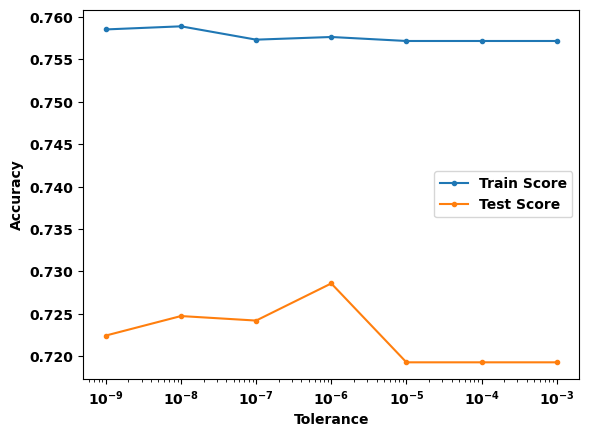

,tol:1e-9,tol:1e-8,tol:1e-7,tol:1e-6,tol:1e-5,tol:1e-4,tol:1e-3
Train score,0.758525,0.758892,0.757320,0.757634,0.757163,0.757163,0.757163
Test score,0.722446,0.724745,0.724212,0.728589,0.719291,0.719291,0.719291
F1 score,0.329633,0.330555,0.330671,0.333025,0.328149,0.328149,0.328149


In [34]:
train_scores =[]
test_scores = []
f1_scores = []

tol_range = [1e-9, 1e-8, 1e-7, 1e-6, 1e-5, 1e-4, 1e-3]

scaler = StandardScaler()
scaler.fit(X_GS_Lsvc_under)
X_scaled_train = scaler.transform(X_GS_Lsvc_under)
X_scaled_test = scaler.transform(X_test_sampled.loc[:, rfe_under.support_])

for t in tol_range:
    
    l_svc_model = LinearSVC(C=1, dual=True, loss='hinge', multi_class='crammer_singer',
          penalty='l1', random_state=42, tol=t)
    l_svc_model.fit(X_scaled_train, y_GS_Lsvc_under)
    
    train_scores.append(l_svc_model.score(X_scaled_train, y_GS_Lsvc_under))
    test_scores.append(l_svc_model.score(X_scaled_test, y_test_sampled))
    
    y_pred = l_svc_model.predict(X_scaled_test)
    f1_scores.append(f1_score(y_test_sampled, y_pred))

scores_data = [train_scores, test_scores, f1_scores]
scores_df = pd.DataFrame(scores_data, columns=["tol:1e-9", "tol:1e-8", "tol:1e-7", "tol:1e-6", "tol:1e-5", "tol:1e-4", "tol:1e-3"],
                         index=["Train score", "Test score", "F1 score"])
    
# plot
plt.figure()
plt.plot(tol_range, train_scores, label="Train Score",marker='.')
plt.plot(tol_range, test_scores,label="Test Score",marker='.')
plt.xlabel('Tolerance')
plt.ylabel('Accuracy')
plt.xscale("log")
plt.legend()
plt.show();

scores_df

The test score with tol=1e-6 is the best. Also, f1 score is the highest when tol=1e-6. Thefore, I'll use tol=1e-6 for the modeling.  
Now, I'll check if the model work better with PCA or not.

In [29]:
# With no PCA

scaler = StandardScaler()
scaler.fit(X_train_under.loc[:, rfe_under.support_])
X_scaled_train = scaler.transform(X_train_under.loc[:, rfe_under.support_])
X_scaled_test = scaler.transform(X_test_sampled.loc[:, rfe_under.support_])
       
l_svc_model = LinearSVC(C=1, dual=True, loss='hinge', multi_class='crammer_singer',
                        penalty='l1', random_state=42, tol=1e-06)
l_svc_model.fit(X_scaled_train, y_train_under)
    
train_score = l_svc_model.score(X_scaled_train, y_train_under)
test_score = l_svc_model.score(X_scaled_test, y_test_sampled)
    
# Evaluation(precision & Recall)
y_pred = l_svc_model.predict(X_scaled_test)

report_initial = classification_report(y_test_sampled, y_pred)
    
print(f"Train score: {train_score}\nTest score: {test_score}\n{report_initial}")

C:\Users\yumem\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Train score: 0.7569011576135352
Test score: 0.7169825118572533
              precision    recall  f1-score   support

           0       0.97      0.71      0.82     87544
           1       0.20      0.80      0.33      8178

    accuracy                           0.72     95722
   macro avg       0.59      0.76      0.57     95722
weighted avg       0.91      0.72      0.78     95722



In [31]:
# With PCA

scaler = StandardScaler()
scaler.fit(X_train_under.loc[:, rfe_under.support_])
X_scaled_train = scaler.transform(X_train_under.loc[:, rfe_under.support_])
X_scaled_test = scaler.transform(X_test_sampled.loc[:, rfe_under.support_])
    
my_PCA = PCA()
my_PCA.fit(X_scaled_train)

X_train_PCA = my_PCA.transform(X_scaled_train)
X_test_PCA = my_PCA.transform(X_scaled_test)   
    
l_svc_model = LinearSVC(C=1, dual=True, loss='hinge', multi_class='crammer_singer',
                        penalty='l1', random_state=42, tol=1e-06)
l_svc_model.fit(X_train_PCA, y_train_under)
    
train_score = l_svc_model.score(X_train_PCA, y_train_under)
test_score = l_svc_model.score(X_test_PCA, y_test_sampled)
    
# Evaluation(precision & Recall)
y_pred = l_svc_model.predict(X_test_PCA)

report_initial = classification_report(y_test_sampled, y_pred)
    
print(f"Train score: {train_score}\nTest score: {test_score}\n{report_initial}")

Train score: 0.7569797286679587
Test score: 0.7171496625645097
              precision    recall  f1-score   support

           0       0.97      0.71      0.82     87544
           1       0.20      0.80      0.33      8178

    accuracy                           0.72     95722
   macro avg       0.59      0.76      0.57     95722
weighted avg       0.91      0.72      0.78     95722



C:\Users\yumem\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


The precision score and recall score didn't change, but the test score improved slightly. Therefore, I'll evaluate the model with PCA.

In [23]:
scaler = StandardScaler()
scaler.fit(X_train_under.loc[:, rfe_under.support_])
X_scaled_train = scaler.transform(X_train_under.loc[:, rfe_under.support_])
X_scaled_test = scaler.transform(X_test_sampled.loc[:, rfe_under.support_])
    
my_PCA = PCA()
my_PCA.fit(X_scaled_train)

X_train_PCA = my_PCA.transform(X_scaled_train)
X_test_PCA = my_PCA.transform(X_scaled_test)   
    
l_svc_model = LinearSVC(C=1, dual=True, loss='hinge', multi_class='crammer_singer',
                        penalty='l1', random_state=42, tol=1e-06)
l_svc_model.fit(X_train_PCA, y_train_under)
    
train_score_under = l_svc_model.score(X_train_PCA, y_train_under)
test_score_under = l_svc_model.score(X_test_PCA, y_test_sampled)
    
# Evaluation(precision & Recall)
y_pred = l_svc_model.predict(X_test_PCA)

report_initial_under = classification_report(y_test_sampled, y_pred)
    
print("After optimization\n")
    
print(f"Train score: {train_score_under}\nTest score: {test_score_under}\n{report_initial_under}")

After optimization

Train score: 0.7569797286679587
Test score: 0.7171496625645097
              precision    recall  f1-score   support

           0       0.97      0.71      0.82     87544
           1       0.20      0.80      0.33      8178

    accuracy                           0.72     95722
   macro avg       0.59      0.76      0.57     95722
weighted avg       0.91      0.72      0.78     95722



C:\Users\yumem\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [24]:
print("Before optimization\n")

L_svc_PCA(X_train_under.loc[:, rfe_under.support_], y_train_under, \
        X_test_sampled.loc[:, rfe_under.support_], y_test_sampled)

Before optimization



C:\Users\yumem\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


Train score: 0.7563773505840449
Test score: 0.731211215812457
              precision    recall  f1-score   support

           0       0.97      0.73      0.83     87544
           1       0.21      0.79      0.33      8178

    accuracy                           0.73     95722
   macro avg       0.59      0.76      0.58     95722
weighted avg       0.91      0.73      0.79     95722



C:\Users\yumem\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


The test score, precision score for 1, and recall score for 0 of the model before optimization is better than the one after optimization. Therefore, I'll compare the model before optimization with other models.

**Over sampled data**

**LinearSVC**

train size = 0.1

In [55]:
%%time

tol = [1e-4, 1e-5]
c_range = [0.01, 0.1, 1, 10, 100]

L_SVC_gridsearch(tol, c_range, X_GS_Lsvc_over, y_GS_Lsvc_over, \
        X_test_sampled.loc[:, rfe_over.support_], y_test_sampled)

C:\Users\yumem\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\yumem\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\yumem\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\yumem\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\yumem\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\yumem\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number 

Hyperparameter :
 LinearSVC(C=0.01, dual=True, loss='hinge', random_state=42)
Train score:
 0.7586164692059141
Test score:
 0.7170347464532709
Best F1 Score: 0.32672135222470794
CPU times: total: 27min 26s
Wall time: 27min 59s


C:\Users\yumem\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\yumem\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
200 fits failed out of a total of 800.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
50 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\yumem\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\yumem\anaconda3\Lib\site-packages\sklearn\base.py", line 1152, in wrapper
    return fit_method(estimator, *args, **kwa

C:\Users\yumem\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\yumem\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\yumem\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


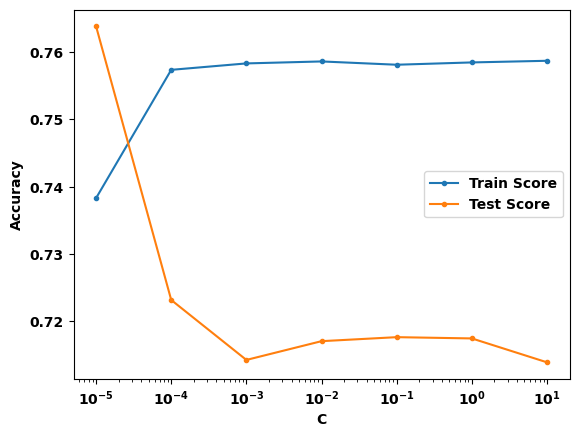

,C:0.00001,C:0.0001,C:0.001,C:0.01,C:0.1,C:1,C:10
Train score,0.738299,0.757368,0.758323,0.758616,0.758127,0.758470,0.758714
Test score,0.763837,0.723157,0.714245,0.717035,0.717630,0.717442,0.713890
F1 score,0.338116,0.330335,0.325633,0.326721,0.326749,0.326636,0.325028


In [32]:
train_scores =[]
test_scores = []
f1_scores = []

c_range = [0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10]

scaler = StandardScaler()
scaler.fit(X_GS_Lsvc_over)
X_scaled_train = scaler.transform(X_GS_Lsvc_over)
X_scaled_test = scaler.transform(X_test_sampled.loc[:, rfe_over.support_])

for c in c_range:
    
    l_svc_model = LinearSVC(C=c, dual=True, loss='hinge', random_state=42)
    l_svc_model.fit(X_scaled_train, y_GS_Lsvc_over)
    
    train_scores.append(l_svc_model.score(X_scaled_train, y_GS_Lsvc_over))
    test_scores.append(l_svc_model.score(X_scaled_test, y_test_sampled))
    
    y_pred = l_svc_model.predict(X_scaled_test)
    f1_scores.append(f1_score(y_test_sampled, y_pred))

scores_data = [train_scores, test_scores, f1_scores]
scores_df = pd.DataFrame(scores_data, columns=["C:0.00001", "C:0.0001", "C:0.001", "C:0.01", "C:0.1", "C:1", "C:10"],
                         index=["Train score", "Test score", "F1 score"])
    
# plot
plt.figure()
plt.plot(c_range, train_scores, label="Train Score",marker='.')
plt.plot(c_range, test_scores,label="Test Score",marker='.')
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.xscale("log")
plt.legend()
plt.show();

scores_df

The model is underffitng when c=0.00001. The test score and f1 score are the highest when c=0.0001. Thefore, I'll use c=0.0001 for the modeling.
Now, I'll check if the model work better with PCA or not.

In [32]:
# With no PCA

scaler = StandardScaler()
scaler.fit(X_train_over.loc[:, rfe_over.support_])
X_scaled_train = scaler.transform(X_train_over.loc[:, rfe_over.support_])
X_scaled_test = scaler.transform(X_test_sampled.loc[:, rfe_over.support_])
       
l_svc_model = LinearSVC(C=0.0001, dual=True, loss='hinge', random_state=42)
l_svc_model.fit(X_scaled_train, y_train_over)
    
train_score = l_svc_model.score(X_scaled_train, y_train_over)
test_score = l_svc_model.score(X_scaled_test, y_test_sampled)
    
# Evaluation(precision & Recall)
y_pred = l_svc_model.predict(X_scaled_test)

report_initial = classification_report(y_test_sampled, y_pred)
    
print(f"Train score: {train_score}\nTest score: {test_score}\n{report_initial}")

Train score: 0.7556790365220797
Test score: 0.715112513319822
              precision    recall  f1-score   support

           0       0.98      0.71      0.82     87544
           1       0.20      0.81      0.33      8178

    accuracy                           0.72     95722
   macro avg       0.59      0.76      0.57     95722
weighted avg       0.91      0.72      0.78     95722



In [33]:
# With PCA

scaler = StandardScaler()
scaler.fit(X_train_over.loc[:, rfe_over.support_])
X_scaled_train = scaler.transform(X_train_over.loc[:, rfe_over.support_])
X_scaled_test = scaler.transform(X_test_sampled.loc[:, rfe_over.support_])
    
my_PCA = PCA()
my_PCA.fit(X_scaled_train)

X_train_PCA = my_PCA.transform(X_scaled_train)
X_test_PCA = my_PCA.transform(X_scaled_test)   
    
l_svc_model = LinearSVC(C=0.0001, dual=True, loss='hinge', random_state=42)
l_svc_model.fit(X_train_PCA, y_train_over)
    
train_score = l_svc_model.score(X_train_PCA, y_train_over)
test_score = l_svc_model.score(X_test_PCA, y_test_sampled)
    
# Evaluation(precision & Recall)
y_pred = l_svc_model.predict(X_test_PCA)

report_initial = classification_report(y_test_sampled, y_pred)
    
print(f"Train score: {train_score}\nTest score: {test_score}\n{report_initial}")

Train score: 0.7556790365220797
Test score: 0.715112513319822
              precision    recall  f1-score   support

           0       0.98      0.71      0.82     87544
           1       0.20      0.81      0.33      8178

    accuracy                           0.72     95722
   macro avg       0.59      0.76      0.57     95722
weighted avg       0.91      0.72      0.78     95722



All scores didn't change with/without PCA. Therefor, I'll evaluate the model without PCA.

In [27]:
scaler = StandardScaler()
scaler.fit(X_train_over.loc[:, rfe_over.support_])
X_scaled_train = scaler.transform(X_train_over.loc[:, rfe_over.support_])
X_scaled_test = scaler.transform(X_test_sampled.loc[:, rfe_over.support_])
       
l_svc_model = LinearSVC(C=0.0001, dual=True, loss='hinge', random_state=42)
l_svc_model.fit(X_scaled_train, y_train_over)
    
train_score_over = l_svc_model.score(X_scaled_train, y_train_over)
test_score_over = l_svc_model.score(X_scaled_test, y_test_sampled)
    
# Evaluation(precision & Recall)
y_pred = l_svc_model.predict(X_scaled_test)

report_initial_over = classification_report(y_test_sampled, y_pred)

print("After optimization\n")
    
print(f"Train score: {train_score_over}\nTest score: {test_score_over}\n{report_initial_over}")

After optimization

Train score: 0.7556790365220797
Test score: 0.715112513319822
              precision    recall  f1-score   support

           0       0.98      0.71      0.82     87544
           1       0.20      0.81      0.33      8178

    accuracy                           0.72     95722
   macro avg       0.59      0.76      0.57     95722
weighted avg       0.91      0.72      0.78     95722



In [26]:
print("Before optimization\n")

L_svc(X_train_over.loc[:, rfe_over.support_], y_train_over, \
        X_test_sampled.loc[:, rfe_over.support_], y_test_sampled)

Before optimization



C:\Users\yumem\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\yumem\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Train score: 0.7563154802702438
Test score: 0.7281711623242306
              precision    recall  f1-score   support

           0       0.97      0.72      0.83     87544
           1       0.21      0.79      0.33      8178

    accuracy                           0.73     95722
   macro avg       0.59      0.76      0.58     95722
weighted avg       0.91      0.73      0.79     95722



All scores of the model before optimization are better than the scores of the model after optimization except recall score for 1. Therefore, I'll compare the model before optimization to other models.

**SMOTE data**

**LinearSVC**

train size = 0.1 LinearSVC

In [56]:
%%time

tol = [1e-4, 1e-5]
c_range = [0.01, 0.1, 1, 10, 100]

L_SVC_gridsearch(tol, c_range, X_GS_Lsvc_smote, y_GS_Lsvc_smote, \
        X_test_smote.loc[:, rfe_smote.support_], y_test_smote)

C:\Users\yumem\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\yumem\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\yumem\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\yumem\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\yumem\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\yumem\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number 

Hyperparameter :
 LinearSVC(C=100, dual=True, loss='hinge', multi_class='crammer_singer',
          penalty='l1', random_state=42)
Train score:
 0.8018701654753745
Test score:
 0.746798019264119
Best F1 Score: 0.3079690489107158
CPU times: total: 18min 58s
Wall time: 19min 15s


C:\Users\yumem\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


C:\Users\yumem\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\yumem\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\yumem\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\yumem\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\yumem\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


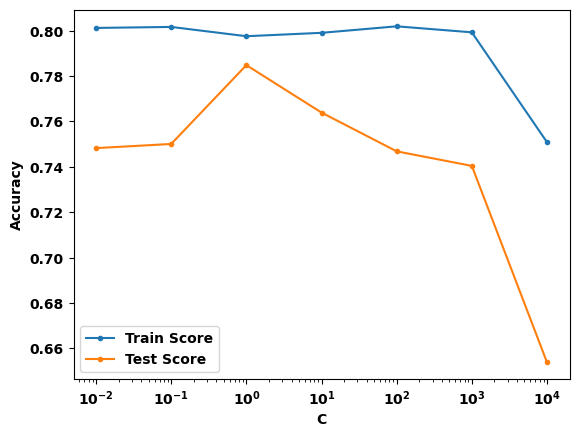

,C:0.01,C:0.1,C:1,C:10,C:100,C:1000,C:10000
Train score,0.801160,0.801601,0.797513,0.799006,0.801870,0.799226,0.750832
Test score,0.748219,0.750047,0.784773,0.763868,0.746798,0.740384,0.653852
F1 score,0.307701,0.307015,0.324436,0.317851,0.307969,0.308907,0.267789


In [38]:
train_scores =[]
test_scores = []
f1_scores = []

c_range = [0.01, 0.1, 1, 10, 100, 1000, 10000]

scaler = StandardScaler()
scaler.fit(X_GS_Lsvc_smote)
X_scaled_train = scaler.transform(X_GS_Lsvc_smote)
X_scaled_test = scaler.transform(X_test_smote.loc[:, rfe_smote.support_])

for c in c_range:
    
    l_svc_model = LinearSVC(C=c, dual=True, loss='hinge', multi_class='crammer_singer',
          penalty='l1', random_state=42)
    l_svc_model.fit(X_scaled_train, y_GS_Lsvc_smote)
    
    train_scores.append(l_svc_model.score(X_scaled_train, y_GS_Lsvc_smote))
    test_scores.append(l_svc_model.score(X_scaled_test, y_test_smote))
    
    y_pred = l_svc_model.predict(X_scaled_test)
    f1_scores.append(f1_score(y_test_smote, y_pred))

scores_data = [train_scores, test_scores, f1_scores]
scores_df = pd.DataFrame(scores_data, columns=["C:0.01", "C:0.1", "C:1", "C:10", "C:100", "C:1000", "C:10000"],
                         index=["Train score", "Test score", "F1 score"])
    
# plot
plt.figure()
plt.plot(c_range, train_scores, label="Train Score",marker='.')
plt.plot(c_range, test_scores,label="Test Score",marker='.')
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.xscale("log")
plt.legend()
plt.show();

scores_df

The test score with c=1 is the best. Also, f1 score is the highest when c=1. Thefore, I'll use c=1 for the modeling.
Now, I'll check if the model work better with PCA or not.

In [28]:
# With no PCA

scaler = StandardScaler()
scaler.fit(X_train_smote.loc[:, rfe_smote.support_])
X_scaled_train = scaler.transform(X_train_smote.loc[:, rfe_smote.support_])
X_scaled_test = scaler.transform(X_test_sampled.loc[:, rfe_smote.support_])
       
l_svc_model = LinearSVC(C=1, dual=True, loss='hinge', multi_class='crammer_singer',
                        penalty='l1', random_state=42)
l_svc_model.fit(X_scaled_train, y_train_smote)
    
train_score = l_svc_model.score(X_scaled_train, y_train_smote)
test_score = l_svc_model.score(X_scaled_test, y_test_smote)
    
# Evaluation(precision & Recall)
y_pred = l_svc_model.predict(X_scaled_test)

report_initial = classification_report(y_test_smote, y_pred)
    
print(f"Train score: {train_score}\nTest score: {test_score}\n{report_initial}")

Train score: 0.8031797708802506
Test score: 0.7507782954806628
              precision    recall  f1-score   support

           0       0.96      0.76      0.85     87544
           1       0.20      0.65      0.31      8178

    accuracy                           0.75     95722
   macro avg       0.58      0.71      0.58     95722
weighted avg       0.89      0.75      0.80     95722



C:\Users\yumem\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [35]:
# With PCA

scaler = StandardScaler()
scaler.fit(X_train_smote.loc[:, rfe_smote.support_])
X_scaled_train = scaler.transform(X_train_smote.loc[:, rfe_smote.support_])
X_scaled_test = scaler.transform(X_test_sampled.loc[:, rfe_smote.support_])
    
my_PCA = PCA()
my_PCA.fit(X_scaled_train)

X_train_PCA = my_PCA.transform(X_scaled_train)
X_test_PCA = my_PCA.transform(X_scaled_test)   
    
l_svc_model = LinearSVC(C=1, dual=True, loss='hinge', multi_class='crammer_singer',
                        penalty='l1', random_state=42)
l_svc_model.fit(X_train_PCA, y_train_smote)
    
train_score = l_svc_model.score(X_train_PCA, y_train_smote)
test_score = l_svc_model.score(X_test_PCA, y_test_smote)
    
# Evaluation(precision & Recall)
y_pred = l_svc_model.predict(X_test_PCA)

report_initial = classification_report(y_test_smote, y_pred)
    
print(f"Train score: {train_score}\nTest score: {test_score}\n{report_initial}")

Train score: 0.8027171252325468
Test score: 0.7468711476985437
              precision    recall  f1-score   support

           0       0.96      0.75      0.85     87544
           1       0.20      0.66      0.31      8178

    accuracy                           0.75     95722
   macro avg       0.58      0.71      0.58     95722
weighted avg       0.90      0.75      0.80     95722



C:\Users\yumem\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


All scores of the model without PCA are slightly better. Therefore, I'll use the model without PCA.

In [29]:
scaler = StandardScaler()
scaler.fit(X_train_smote.loc[:, rfe_smote.support_])
X_scaled_train = scaler.transform(X_train_smote.loc[:, rfe_smote.support_])
X_scaled_test = scaler.transform(X_test_sampled.loc[:, rfe_smote.support_])
       
l_svc_model = LinearSVC(C=1, dual=True, loss='hinge', multi_class='crammer_singer',
                        penalty='l1', random_state=42)
l_svc_model.fit(X_scaled_train, y_train_smote)
    
train_score_somte = l_svc_model.score(X_scaled_train, y_train_smote)
test_score_somte = l_svc_model.score(X_scaled_test, y_test_smote)
    
# Evaluation(precision & Recall)
y_pred = l_svc_model.predict(X_scaled_test)

report_initial_somte = classification_report(y_test_smote, y_pred)
    
print("After optimization\n")    

print(f"Train score: {train_score_somte}\nTest score: {test_score_somte}\n{report_initial_somte}")

After optimization

Train score: 0.8031797708802506
Test score: 0.7507782954806628
              precision    recall  f1-score   support

           0       0.96      0.76      0.85     87544
           1       0.20      0.65      0.31      8178

    accuracy                           0.75     95722
   macro avg       0.58      0.71      0.58     95722
weighted avg       0.89      0.75      0.80     95722



C:\Users\yumem\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [30]:
print("Before optimization\n")

L_svc(X_train_smote.loc[:, rfe_smote.support_], y_train_smote, \
        X_test_smote.loc[:, rfe_smote.support_], y_test_smote)

Before optimization



C:\Users\yumem\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


Train score: 0.8011994516792323
Test score: 0.7835607279413301
              precision    recall  f1-score   support

           0       0.96      0.80      0.87     87544
           1       0.22      0.61      0.32      8178

    accuracy                           0.78     95722
   macro avg       0.59      0.70      0.60     95722
weighted avg       0.89      0.78      0.82     95722



C:\Users\yumem\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


All scores of the model before optimization are better. Therefore, I'll compare the model before optimization to othe models.

### Model Comparison

In [31]:
# under sampled data

scaler = StandardScaler()
scaler.fit(X_train_under.loc[:, rfe_under.support_])
X_scaled_train = scaler.transform(X_train_under.loc[:, rfe_under.support_])
X_scaled_test = scaler.transform(X_test_sampled.loc[:, rfe_under.support_])
  
my_PCA = PCA()
my_PCA.fit(X_scaled_train)

X_train_PCA = my_PCA.transform(X_scaled_train)
X_test_PCA = my_PCA.transform(X_scaled_test)   
    
l_svc_model = LinearSVC()
l_svc_model.fit(X_train_PCA, y_train_under)
    
train_score_under = l_svc_model.score(X_train_PCA, y_train_under)
test_score_under = l_svc_model.score(X_test_PCA, y_test_sampled)
    
# Evaluation(precision & Recall)
y_pred = l_svc_model.predict(X_test_PCA)

report_initial_under = classification_report(y_test_sampled, y_pred)

print("Under Sampled data\n")
    
print(f"Train score: {train_score}\nTest score: {test_score}\n{report_initial}")

C:\Users\yumem\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


Under Sampled data

Train score: 0.8031797708802506
Test score: 0.7507782954806628
              precision    recall  f1-score   support

           0       0.96      0.76      0.85     87544
           1       0.20      0.65      0.31      8178

    accuracy                           0.75     95722
   macro avg       0.58      0.71      0.58     95722
weighted avg       0.89      0.75      0.80     95722



C:\Users\yumem\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [32]:
# over sampled data

scaler = StandardScaler()
scaler.fit(X_train_over.loc[:, rfe_over.support_])
X_scaled_train = scaler.transform(X_train_over.loc[:, rfe_over.support_])
X_scaled_test = scaler.transform(X_test_sampled.loc[:, rfe_over.support_])
       
l_svc_model = LinearSVC()
l_svc_model.fit(X_scaled_train, y_train_over)
    
train_score = l_svc_model.score(X_scaled_train, y_train_over)
test_score = l_svc_model.score(X_scaled_test, y_test_sampled)
    
# Evaluation(precision & Recall)
y_pred = l_svc_model.predict(X_scaled_test)

report_initial = classification_report(y_test_sampled, y_pred)

print("Over Sampled data\n")
    
print(f"Train score: {train_score}\nTest score: {test_score}\n{report_initial}")

C:\Users\yumem\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


Over Sampled data

Train score: 0.7563154802702438
Test score: 0.7281711623242306
              precision    recall  f1-score   support

           0       0.97      0.72      0.83     87544
           1       0.21      0.79      0.33      8178

    accuracy                           0.73     95722
   macro avg       0.59      0.76      0.58     95722
weighted avg       0.91      0.73      0.79     95722



C:\Users\yumem\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [33]:
# smote data

scaler = StandardScaler()
scaler.fit(X_train_smote.loc[:, rfe_smote.support_])
X_scaled_train = scaler.transform(X_train_smote.loc[:, rfe_smote.support_])
X_scaled_test = scaler.transform(X_test_sampled.loc[:, rfe_smote.support_])
       
l_svc_model = LinearSVC()
l_svc_model.fit(X_scaled_train, y_train_smote)
    
train_score = l_svc_model.score(X_scaled_train, y_train_smote)
test_score = l_svc_model.score(X_scaled_test, y_test_smote)
    
# Evaluation(precision & Recall)
y_pred = l_svc_model.predict(X_scaled_test)

report_initial = classification_report(y_test_smote, y_pred)
    
print("SMOTE data\n")   

print(f"Train score: {train_score}\nTest score: {test_score}\n{report_initial}")

C:\Users\yumem\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


SMOTE data

Train score: 0.8011994516792323
Test score: 0.7835607279413301
              precision    recall  f1-score   support

           0       0.96      0.80      0.87     87544
           1       0.22      0.61      0.32      8178

    accuracy                           0.78     95722
   macro avg       0.59      0.70      0.60     95722
weighted avg       0.89      0.78      0.82     95722



C:\Users\yumem\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


The test scores of under sampled data and smote data are better. However, I prefer a model with better recall score for 1 since I'd like to predict positive result correctly. Therefore, I'll choose the model with over sampled data.

**From Logistic Regression: Over Sampled dataset**